In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Ocupacion hotelera

In [18]:
hotelMensualMedellin = pd.read_csv("porcentaje_ocupacion_hotelera_mensual_por_zona.csv")

In [19]:
hotelMensualMedellin["Año"] = hotelMensualMedellin["ocu_periodo"].apply(lambda x: int(str(x)[:4]))
hotelMensualMedellin["Mes"] = hotelMensualMedellin["ocu_periodo"].apply(lambda x: int(str(x)[4:]))
hotelMensualMedellin.drop(columns=["ocu_periodo"], inplace=True)
hotelMensualMedellin = hotelMensualMedellin[hotelMensualMedellin["Año"] < 2023]

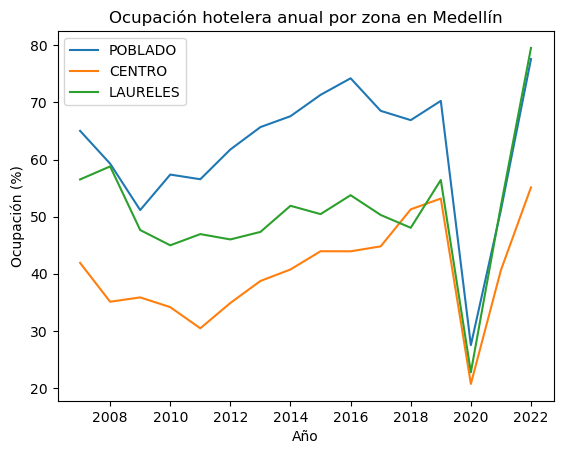

In [43]:
for zona in hotelMensualMedellin["ocu_zona"].unique():
    zonaData = hotelMensualMedellin[hotelMensualMedellin["ocu_zona"] == zona]
    zonaData = zonaData[["Año","ocu_valor"]].groupby(["Año"]).mean().reset_index()
    plt.plot(zonaData["Año"], zonaData["ocu_valor"], label=zona)
plt.legend()
plt.title("Ocupación hotelera anual por zona en Medellín")
plt.xlabel("Año")
plt.ylabel("Ocupación (%)")
plt.show()

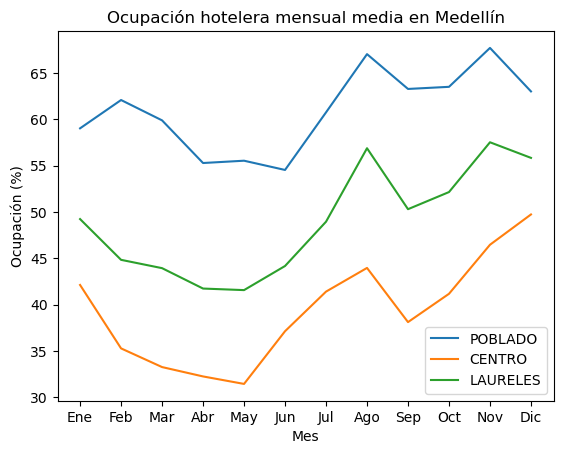

In [45]:
for zona in hotelMensualMedellin["ocu_zona"].unique():
    zonaData = hotelMensualMedellin[hotelMensualMedellin["ocu_zona"] == zona]
    zonaData = zonaData[zonaData["Año"]!=2022][["Mes","ocu_valor"]].groupby(["Mes"]).mean().reset_index()
    plt.plot(zonaData["Mes"], zonaData["ocu_valor"], label=zona)
plt.legend()
plt.title("Ocupación hotelera mensual media en Medellín")
plt.xticks(np.arange(1,13),["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"])
plt.xlabel("Mes")
plt.ylabel("Ocupación (%)")
plt.show()